In [164]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec

In [165]:
data_271 = pd.read_csv("df_temp_271.csv")
data_271_moy = pd.read_csv("df_temp_271_moy.csv")

data_274 = pd.read_csv("df_temp_274.csv")
data_274_moy = pd.read_csv("df_temp_274_moy.csv")

data_fb = pd.read_csv("df_temp_276.csv")
data_fb_moy = pd.read_csv("df_temp_276_moy.csv")

data_air = pd.read_csv("df_temp_air.csv")
data_air_moy = pd.read_csv("df_temp_air_moy.csv")

In [166]:
data_271["Date"] = pd.to_datetime(data_271["Date"])
data_271_moy["Jours"] = pd.to_datetime(data_271_moy["Jours"])

data_274["Date"] = pd.to_datetime(data_274["Date"])
data_274_moy["Jours"] = pd.to_datetime(data_274_moy["Jours"])

data_fb["Date"] = pd.to_datetime(data_fb["Date"])
data_fb_moy["Jours"] = pd.to_datetime(data_fb_moy["Jours"])

data_air["Date"] = pd.to_datetime(data_air["Date"])
data_air_moy["Jours"] = pd.to_datetime(data_air_moy["Jours"])


In [167]:
tot_temps_271 = data_271["Date"]
tot_T_271 = data_271["Temperature 271"]

tot_temps_274 = data_274["Date"]
tot_T_274 = data_274["Temperature 274"]

tot_temps_fb = data_fb["Date"]
tot_T_fb = data_fb["Temperature 276"]

tot_temps_air = data_air["Date"]
tot_T_air = data_air["Temperature 271"]

In [168]:
#Moyennes journalieres 
moy_temps_271 = data_271_moy["Jours"]
moy_T_271 = data_271_moy["Moyenne T"]

moy_temps_274 = data_274_moy["Jours"]
moy_T_274 = data_274_moy["Moyenne T"]

moy_temps_fb = data_fb_moy["Jours"]
moy_T_fb = data_fb_moy["Moyenne T"]

moy_temps_air = data_air_moy["Jours"]
moy_T_air = data_air_moy["Moyenne T"]

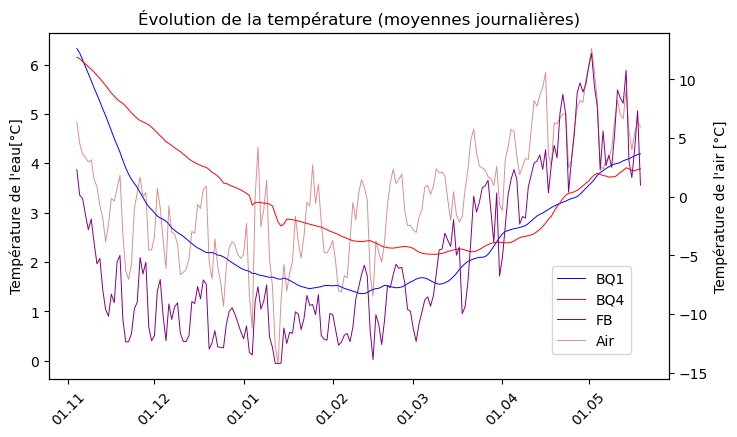

In [169]:
# Création de la figure et des axes
fig, ax1 = plt.subplots(figsize=(8, 4.5))
ax2 = ax1.twinx()  # Deuxième axe pour les précipitations

# Précipitations en arrière-plan
ax2.plot(moy_temps_air, moy_T_air, lw=0.7, color='firebrick', alpha=0.5, label='Air')

# Courbes de température
#ax1.plot(tot_temps_271, tot_T_271, color='blue', lw=0.7, label='BQ1')
ax1.plot(moy_temps_271, moy_T_271, lw=0.7, color='blue', label='BQ1')
#ax1.plot(tot_temps_274, tot_T_274, color='red', lw=0.7, label='BQ4')
ax1.plot(moy_temps_274, moy_T_274, lw=0.7, color='red', label='BQ4')
#ax1.plot(tot_temps_fb[50:], tot_T_fb[50:], color='purple', lw=0.2, label='Flüelabach') 
ax1.plot(moy_temps_fb, moy_T_fb, color='purple', lw=0.7, linestyle='-', label='FB')

# Mise en forme
ax1.set_title("Évolution de la température (moyennes journalières)")
ax1.set_ylabel("Température de l'eau[°C]")
ax2.set_ylabel("Température de l\'air [°C]")

# Légende combinée
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(0.8, 0.2))
#ax1.legend(lines_1, labels_1, loc='center left', bbox_to_anchor=(0.62, 0.18))

#ax1.grid(alpha=0.5)

# Formattage des dates sur l'axe x
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
ax1.tick_params(axis='x', rotation=45)

# Affichage ou sauvegarde
#plt.savefig('evolution_temperature_tot_crosscorr.png', dpi=300, bbox_inches='tight')
plt.show()

In [170]:
print(moy_temps_271[27])
print(moy_temps_271[148])

2024-12-01 00:00:00
2025-04-01 00:00:00


In [171]:
from scipy.signal import find_peaks

signal_271 = moy_T_271[148:].values
signal_274 = moy_T_274[148:].values
signal_fb = moy_T_fb[148:].values
signal_air = moy_T_air[148:].values

# Maxima et minima locaux signal_271
peaks_271, _ = find_peaks(signal_271)
inv_peaks_271, _ = find_peaks(-signal_271)

# Maxima et minima locaux signal_274
peaks_274, _ = find_peaks(signal_274)
inv_peaks_274, _ = find_peaks(-signal_274)

# Maxima et minima locaux signal_fb
peaks_fb, _ = find_peaks(signal_fb)
inv_peaks_fb, _ = find_peaks(-signal_fb)

# Maxima et minima locaux signal_air
peaks_air, _ = find_peaks(signal_air)
inv_peaks_air, _ = find_peaks(-signal_air)

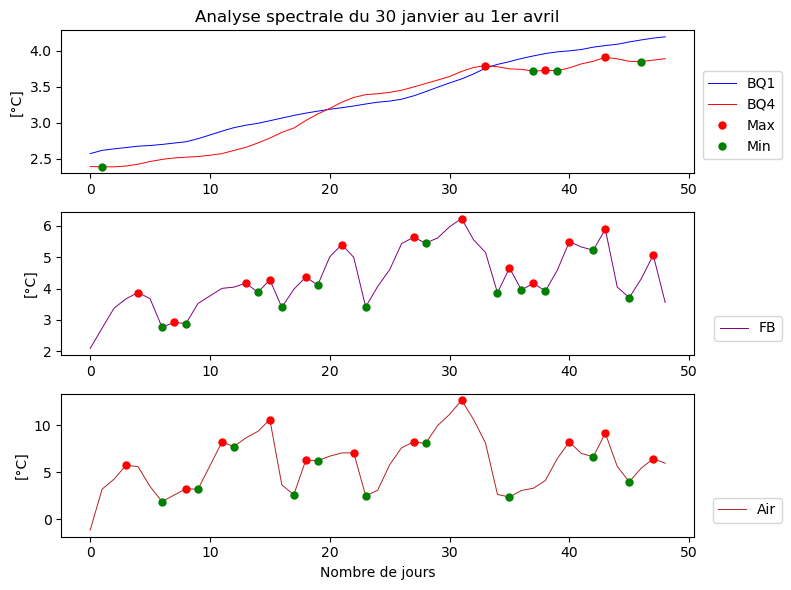

In [172]:
# Affichage
fig, ax = plt.subplots(3,1, figsize=(8,6))

ax[0].set_title('Analyse spectrale du 30 janvier au 1er avril')
ax[0].plot(signal_271, label="BQ1", lw=0.7, color='blue')
ax[0].plot(signal_274, label="BQ4", lw=0.7, color='red')

ax[0].plot(peaks_271, signal_271[peaks_271], "ro", markersize='5', label="Max")
ax[0].plot(inv_peaks_271, signal_271[inv_peaks_271], "go", markersize='5', label="Min")
ax[0].plot(peaks_274, signal_274[peaks_274], "ro", markersize='5')
ax[0].plot(inv_peaks_274, signal_274[inv_peaks_274], "go", markersize='5')

ax[1].plot(signal_fb, label="FB", lw=0.7, color='purple')
ax[1].plot(peaks_fb, signal_fb[peaks_fb], "ro", markersize='5')
ax[1].plot(inv_peaks_fb, signal_fb[inv_peaks_fb], "go", markersize='5')

ax[2].plot(signal_air, label="Air", lw=0.7, color='firebrick')
ax[2].plot(peaks_air, signal_air[peaks_air], "ro", markersize='5')
ax[2].plot(inv_peaks_air, signal_air[inv_peaks_air], "go", markersize='5')

ax[0].legend(loc='lower right', bbox_to_anchor=(1.15, 0.05))
ax[1].legend(loc='lower right', bbox_to_anchor=(1.15, 0.05))
ax[2].legend(loc='lower right', bbox_to_anchor=(1.15, 0.05))

ax[0].set_ylabel("[°C]")
ax[1].set_ylabel("[°C]")
ax[2].set_ylabel("[°C]")
ax[2].set_xlabel("Nombre de jours")

plt.tight_layout()
#plt.savefig('analyse_spectrale_fev-avril.png', dpi=300, bbox_inches='tight')
plt.show()


In [173]:
# Vecteurs sigaux centrés et normalisés

signal_271_norm = (signal_271 - np.mean(signal_271)) / np.std(signal_271)
signal_274_norm = (signal_274 - np.mean(signal_274)) / np.std(signal_274)
signal_fb_norm = (signal_fb - np.mean(signal_fb)) / np.std(signal_fb)
signal_air_norm = (signal_air - np.mean(signal_air)) / np.std(signal_air)

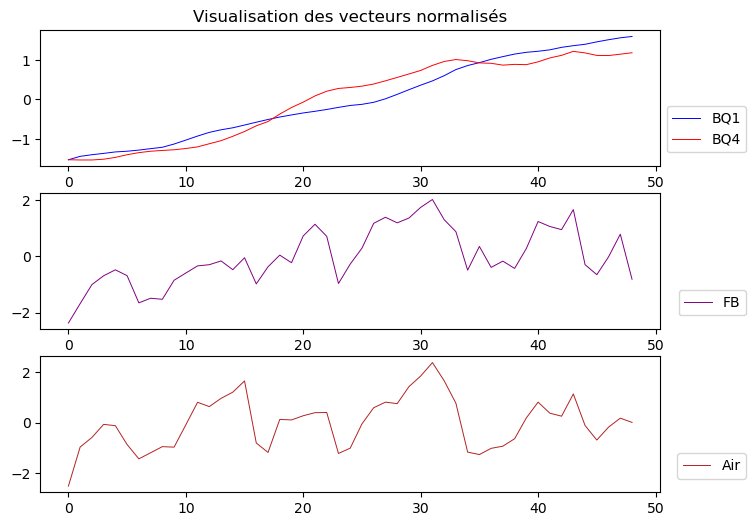

In [174]:
# Visualisation des vecteurs normalisés 

fig, ax = plt.subplots(3, 1, figsize=(8, 6))

ax[0].set_title('Visualisation des vecteurs normalisés')
ax[0].plot(signal_271_norm, color='blue', label='BQ1', lw=0.7)
ax[0].plot(signal_274_norm, color='red', label='BQ4', lw=0.7)

ax[1].plot(signal_fb_norm, color='purple', label='FB', lw=0.7)

ax[2].plot(signal_air_norm, color='firebrick', label='Air', lw=0.7)

ax[0].legend(loc='lower right', bbox_to_anchor=(1.15, 0.05))
ax[1].legend(loc='lower right', bbox_to_anchor=(1.15, 0.05))
ax[2].legend(loc='lower right', bbox_to_anchor=(1.15, 0.05))

#plt.savefig('plot_vecteurs_normalises_2801-0104.png', dpi=300, bbox_inches='tight')
plt.show()

In [175]:
#moyenne glissante
window = 12  # à adapter selon la durée du cycle
trend_271 = pd.Series(signal_271_norm).rolling(window, center=True).mean()
trend_274 = pd.Series(signal_274_norm).rolling(window, center=True).mean()
trend_fb = pd.Series(signal_fb_norm).rolling(window, center=True).mean()
trend_air = pd.Series(signal_air_norm).rolling(window, center=True).mean()


In [176]:
#détachement de la tendance
fluct_271 = signal_271_norm - trend_271
fluct_274 = signal_274_norm - trend_274
fluct_fb = signal_fb_norm - trend_fb
fluct_air = signal_air_norm - trend_air

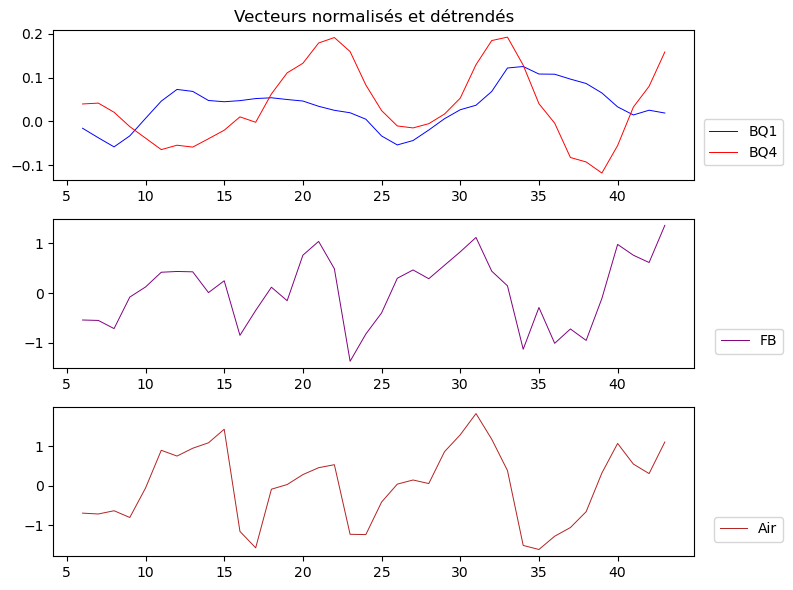

In [177]:
fig, ax = plt.subplots(3, 1, figsize=(8, 6))
ax[0].set_title('Vecteurs normalisés et détrendés')

ax[0].plot(fluct_271, label='BQ1', color='blue', lw=0.7)
ax[0].plot(fluct_274, label='BQ4', color='red', lw=0.7)

ax[1].plot(fluct_fb, label='FB', color='purple', lw=0.7)
ax[2].plot(fluct_air, label='Air', color='firebrick', lw=0.7)

for a in ax:
    a.legend(loc='lower right', bbox_to_anchor=(1.15, 0.05))

plt.tight_layout()
plt.show()


In [178]:
#lissage des vecteurs normalisés et detrendés 
windowsmooth = 4
fluct_271_smooth = pd.Series(fluct_271).rolling(windowsmooth, center=True).mean()
fluct_274_smooth = pd.Series(fluct_274).rolling(windowsmooth, center=True).mean()
fluct_fb_smooth = pd.Series(fluct_fb).rolling(windowsmooth, center=True).mean()
fluct_air_smooth = pd.Series(fluct_air).rolling(windowsmooth, center=True).mean()

In [179]:
fluct_271_smooth = fluct_271_smooth.dropna().values
fluct_274_smooth = fluct_274_smooth.dropna().values
fluct_fb_smooth = fluct_fb_smooth.dropna().values
fluct_air_smooth = fluct_air_smooth.dropna().values

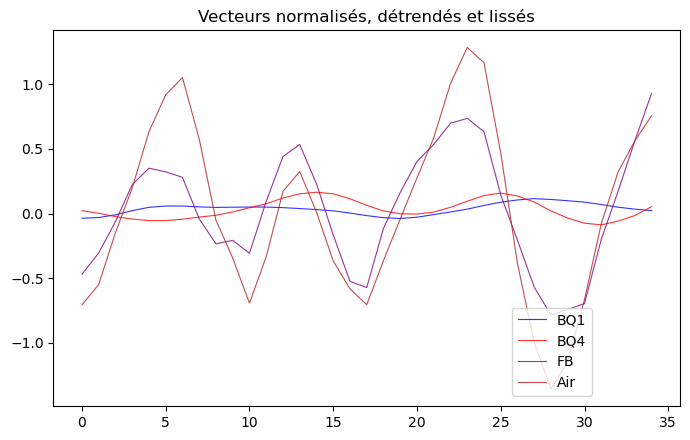

In [180]:
plt.figure(figsize=(7, 4.5))
plt.title('Vecteurs normalisés, détrendés et lissés')

plt.plot(fluct_271_smooth, label='BQ1', color='blue', lw=0.8, alpha = 0.8)
plt.plot(fluct_274_smooth, label='BQ4', color='red', lw=0.8, alpha = 0.8)

plt.plot(fluct_fb_smooth, label='FB', color='purple', lw=0.8, alpha = 0.8)
plt.plot(fluct_air_smooth, label='Air', color='firebrick', lw=0.8, alpha = 0.8)

plt.legend(loc='lower right', bbox_to_anchor=(0.87, 0.01))

plt.tight_layout()
plt.show()

In [181]:
minlen = min(len(fluct_271_smooth), len(fluct_274_smooth), len(fluct_fb_smooth), len(fluct_air_smooth))

fluct_271_smooth = fluct_271_smooth[:minlen]
fluct_274_smooth = fluct_274_smooth[:minlen]
fluct_fb_smooth = fluct_fb_smooth[:minlen]
fluct_air_smooth = fluct_air_smooth[:minlen]

In [182]:
from scipy.signal import correlate

# Corrélation croisée
#FB vs BQ1
corr_271 = correlate(fluct_271_smooth, fluct_fb_smooth, mode='full')
lags_271 = np.arange(-len(fluct_271_smooth) + 1, len(fluct_fb_smooth))
#Air vs BQ1
corr_271_air = correlate(fluct_air_smooth, fluct_271_smooth, mode='full')
lags_271_air = np.arange(-len(fluct_air_smooth) + 1, len(fluct_271_smooth))
#FB vs BQ4
corr_274 = correlate(fluct_274_smooth, fluct_fb_smooth, mode='full')
lags_274 = np.arange(-len(fluct_274_smooth) + 1, len(fluct_fb_smooth))
#FB vs Air
corr_fb = correlate(fluct_fb_smooth, fluct_air_smooth, mode='full')
lags_fb = np.arange(-len(fluct_fb_smooth) + 1, len(fluct_air_smooth))

# Lag du maximum de corrélation
#FB vs BQ1
lag_max_271 = lags_271[np.argmax(corr_271)]
print("Décalage optimal FB vs BQ1 :", lag_max_271, "jours")
#Air vs BQ1
lag_max_271_air = lags_271_air[np.argmax(corr_271_air)]
print("Décalage optimal Air vs BQ1 :", lag_max_271_air, "jours")
#FB vs BQ4
lag_max_274 = lags_274[np.argmax(corr_274)]
print("Décalage optimal FB vs BQ4 :", lag_max_274, "jours")
#FB vs Air
lag_max_fb = lags_fb[np.argmax(corr_fb)]
print("Décalage optimal FB vs Air :", lag_max_fb, "jours")

Décalage optimal FB vs BQ1 : -9 jours
Décalage optimal Air vs BQ1 : -6 jours
Décalage optimal FB vs BQ4 : 2 jours
Décalage optimal FB vs Air : 0 jours


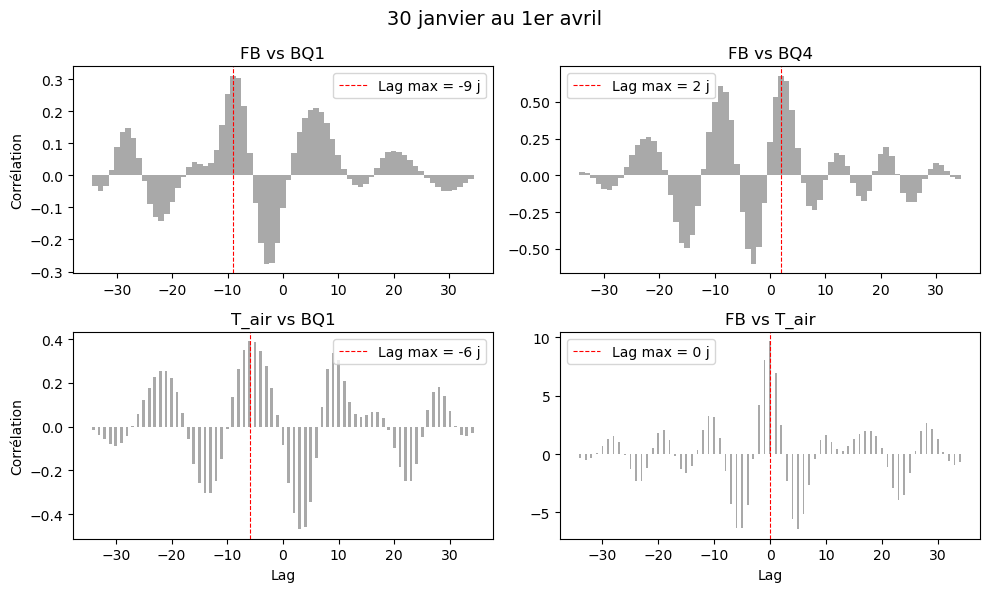

In [183]:
#Visualistation des corrélations croisées ainsi que leurs lags

fig, ax = plt.subplots(2, 2, figsize=(10,6))
fig.suptitle("30 janvier au 1er avril", fontsize=14)

ax[0, 0].bar(lags_271, corr_271, width=1, color='darkgrey')
ax[0, 0].axvline(lag_max_271, color='red', linestyle='--', lw=0.8, label=f"Lag max = {lag_max_271} j")
ax[0, 0].set_ylabel('Corrélation')
ax[0, 0].set_title('FB vs BQ1')
ax[0, 0].legend(loc='upper right')

ax[0, 1].bar(lags_274, corr_274, width=1, color='darkgrey')
ax[0, 1].axvline(lag_max_274, color='red', linestyle='--', lw=0.8, label=f"Lag max = {lag_max_274} j")
ax[0, 1].set_title('FB vs BQ4')
ax[0, 1].legend(loc='upper left')

ax[1, 0].bar(lags_271_air, corr_271_air, width=0.5, color='darkgrey')
ax[1, 0].axvline(lag_max_271_air, color='red', linestyle='--', lw=0.8, label=f"Lag max = {lag_max_271_air} j")
ax[1, 0].set_ylabel('Corrélation')
ax[1, 0].set_title('T_air vs BQ1')
ax[1, 0].legend(loc='upper right')
ax[1, 0].set_xlabel('Lag')

ax[1, 1].bar(lags_fb, corr_fb, width=0.3, color='darkgrey')
ax[1, 1].axvline(lag_max_fb, color='red', linestyle='--', lw=0.8, label=f"Lag max = {lag_max_fb} j")
ax[1, 1].set_title('FB vs T_air')
ax[1, 1].legend(loc='upper left')
ax[1, 1].set_xlabel('Lag')

plt.tight_layout()
#plt.savefig('crosscorr_timelag_mai.png', dpi=300, bbox_inches='tight')
plt.show()

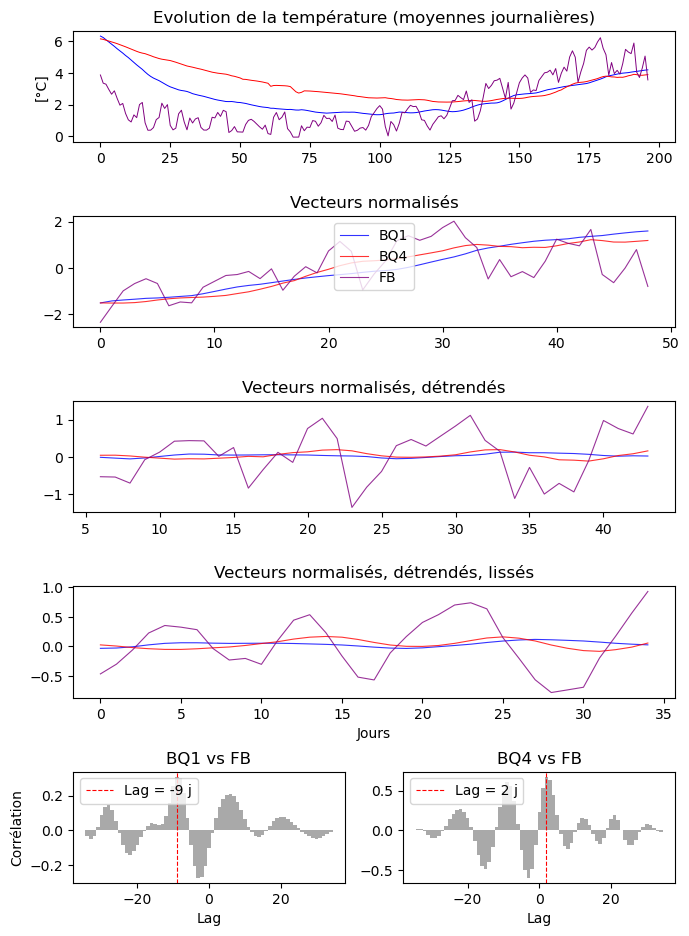

In [184]:
#graphes finaux 

fig = plt.figure(figsize=(7, 10))
gs = gridspec.GridSpec(5, 2, figure=fig)

# Ligne 1 : graphe sur toute la largeur
ax1 = fig.add_subplot(gs[0, :])
# Ligne 2 : graphe sur toute la largeur
ax2 = fig.add_subplot(gs[1, :])
# Ligne 3
ax3 = fig.add_subplot(gs[2, :])
# Ligne 4
ax4 = fig.add_subplot(gs[3, :])
# Ligne 5 : deux graphes côte à côte
ax5 = fig.add_subplot(gs[4, 0])
ax6 = fig.add_subplot(gs[4, 1])

# Exemples :
ax1.set_title("Evolution de la température (moyennes journalières)")
#ax1.plot(moy_temps_air, moy_T_air, lw=0.7, color='firebrick', alpha=0.5, label='Air')
ax1.plot( moy_T_271[:], lw=0.7, color='blue', label='BQ1')
ax1.plot( moy_T_274[:], lw=0.7, color='red', label='BQ4')
ax1.plot( moy_T_fb[:], color='purple', lw=0.7, linestyle='-', label='FB')
ax1.set_ylabel("[°C]")

ax2.set_title("Vecteurs normalisés")
ax2.plot(signal_271_norm, label='BQ1', color='blue', lw=0.8, alpha = 0.8)
ax2.plot(signal_274_norm, label='BQ4', color='red', lw=0.8, alpha = 0.8)
ax2.plot(signal_fb_norm, label='FB', color='purple', lw=0.8, alpha = 0.8)
ax2.legend(loc="upper center")
#ax2.plot(signal_air_norm, label='Air', color='firebrick', lw=0.8, alpha = 0.8)

ax3.set_title("Vecteurs normalisés, détrendés") #moyenne glissante sur 11 jours 
ax3.plot(fluct_271, label='BQ1', color='blue', lw=0.8, alpha = 0.8)
ax3.plot(fluct_274, label='BQ4', color='red', lw=0.8, alpha = 0.8)
ax3.plot(fluct_fb, label='FB', color='purple', lw=0.8, alpha = 0.8)

ax4.set_title("Vecteurs normalisés, détrendés, lissés")
ax4.plot(fluct_271_smooth, label='BQ1', color='blue', lw=0.8, alpha = 0.8)
ax4.plot(fluct_274_smooth, label='BQ4', color='red', lw=0.8, alpha = 0.8)
ax4.plot(fluct_fb_smooth, label='FB', color='purple', lw=0.8, alpha = 0.8)
ax4.set_xlabel("Jours")

ax5.set_title("BQ1 vs FB")
ax5.bar(lags_271, corr_271, width=1, color='darkgrey')
ax5.axvline(lag_max_271, color='red', linestyle='--', lw=0.8, label=f"Lag = {lag_max_271} j")
ax5.set_ylabel('Corrélation')
ax5.set_xlabel("Lag")
ax5.legend(loc='upper left')

ax6.set_title("BQ4 vs FB")
ax6.bar(lags_274, corr_274, width=1, color='darkgrey')
ax6.axvline(lag_max_274, color='red', linestyle='--', lw=0.8, label=f"Lag = {lag_max_274} j")
ax6.set_xlabel("Lag")
ax6.legend(loc='upper left')

plt.tight_layout()
#fig.suptitle("Estimation du retard thermique dans les sources", fontsize=14)
plt.subplots_adjust(top=0.91)  # Ajuste si nécessaire
#plt.savefig('retard_thermique_total_final.png', dpi=300, bbox_inches='tight')
plt.show()

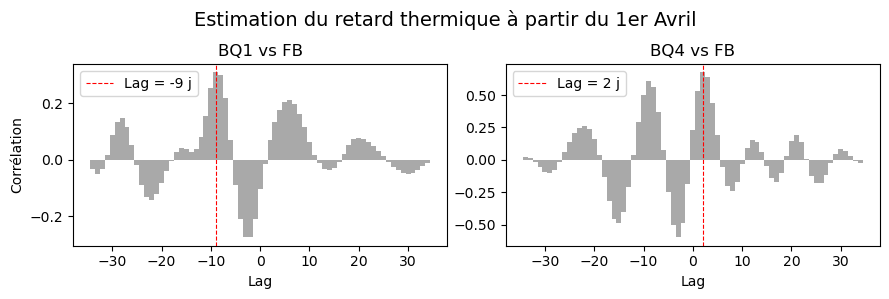

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(9,3))

ax[0].set_title("BQ1 vs FB")
ax[0].bar(lags_271, corr_271, width=1, color='darkgrey')
ax[0].axvline(lag_max_271, color='red', linestyle='--', lw=0.8, label=f"Lag = {lag_max_271} j")
ax[0].set_ylabel('Corrélation')
ax[0].set_xlabel("Lag")
ax[0].legend(loc='upper left')

ax[1].set_title("BQ4 vs FB")
ax[1].bar(lags_274, corr_274, width=1, color='darkgrey')
ax[1].axvline(lag_max_274, color='red', linestyle='--', lw=0.8, label=f"Lag = {lag_max_274} j")
ax[1].set_xlabel("Lag")
ax[1].legend(loc='upper left')

plt.tight_layout()
plt.suptitle("Estimation du retard thermique à partir du 1er Avril", fontsize=14)
plt.subplots_adjust(top=0.8)  # Ajuste si nécessaire
#plt.savefig('retard_thermique_avril_mai.png', dpi=300, bbox_inches='tight')
plt.show()